<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats as stats

In [125]:
disp = 225
sigma = np.sqrt(disp)  # Стандартное отклонение
Z = 1.96  # 95%   # Квантиль нормального распределения. 
delta = 3 #  #Погрешность

In [126]:
### Ваши код/вычисления...
n = ((sigma*Z)/delta)**2
round(n)

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [115]:
n = 25
m, se = 130, 15
# Доверительный интервал 98%, исходя из этого получаем квантиль равный 2,33

d = (15 / 5) * 2.33
d

6.99

In [123]:
L = ((m + d) - (m - d))
round(L)

14

<div class ="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально

</div>

In [93]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

In [96]:
alpha = 0.001
t, p = scipy.stats.ttest_ind(mens, womens, equal_var=False)

print("t = " + str(t))
print("p = " + str(p))

if p < alpha:
    print(f'Отклоняем гипотезу H0, различия в выборках мужчин и женщин статистически значимы на уровне {alpha :.1%}')
else:
    print(f'Гипотеза H0 верна, различия в выборках мужчин и женщин статистически не значимы на уровне {alpha :.1%}')

t = 3.6635841716708897
p = 0.00024875321039012085
Отклоняем гипотезу H0, различия в выборках мужчин и женщин статистически значимы на уровне 0.1%


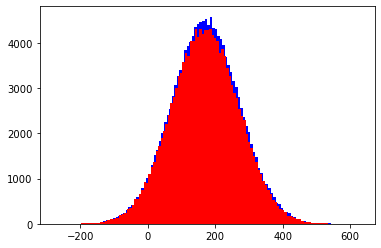

In [39]:
plt.hist(mens, bins=120, color='blue');
plt.hist(womens, bins=120, color='red');

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [1]:
sigma = 150
Z = 1.96  # для β = 0.95
delta = 50

n1 = (Z * sigma / delta)**2
print(f'Oбъем необходимой выборки {round(n1)}')

Oбъем необходимой выборки 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [47]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [53]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

alpha = 0.05
oddsratio, pvalue = scipy.stats.fisher_exact(observations)

print(f'pvalue = {pvalue}')
if p < alpha:
    print(f'Отклоняем гипотезу H0, волшебник не умеет предсказывать погоду')
else:
    print(f'Гипотеза H0 верна, волшебник умеет предсказывать погоду')

pvalue = 0.35417955365927367
Отклоняем гипотезу H0, волшебник не умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [56]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

mean_confidence_interval(data, confidence)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [86]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [87]:
#  Критерий Стьюдента для независимых выборок
stat, p = scipy.stats.ttest_ind(A, B)
alpha = 0.05

# двусторонний тест
print(f'p = {p}')

if p < alpha:
    print(f'Верна гипотеза H1: A и B отличаются')
else:
    print(f'Верна гипотеза H0: A и B не отличаются')

p = 4.623319592204015e-25
Верна гипотеза H1: A и B отличаются


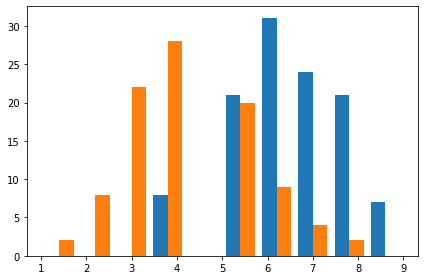

In [88]:
fig, ax1 = plt.subplots()
ax1.hist([A,B])
plt.tight_layout()

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

При p-value = 0.03, и при уровне значимости 0.05 мы можем отвергнуть нулевую гипотезу - распределение не является нормальным, однако вероятность ошибиться 5%

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [89]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)
alpha = 0.05
# Подсказка, обратите внимание на Two-sample T-test

stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

In [90]:
if pvalue < alpha:  
    print(f'Эффективность препаратов отличается при уровне значимости {alpha :.1%}')
else:
    print(f'Эффективность препаратов одинакова при уровне значимости {alpha :.1%}')

Эффективность препаратов одинакова при уровне значимости 5.0%


Различия были бы значимы, если p-value был бы меньше принятого нами уровня значимости 0.05


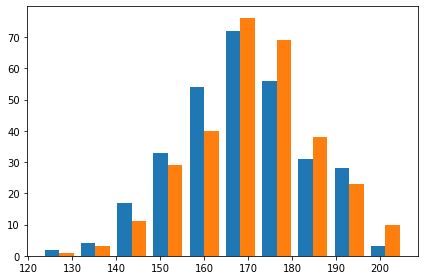

In [91]:
fig, ax1 = plt.subplots()
ax1.hist([A,B])
plt.tight_layout()